In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/perdue/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
arr = np.load('perfmat1461944084.npy')

In [3]:
def reorder_matrix(ndarr):
    if ndarr.shape != (11, 11):
        return np.array([0], dtype=np.float)
    mid_arr = np.zeros((11, 11), dtype=np.float)
    new_arr = np.zeros((11, 11), dtype=np.float)
    mid_arr[0, :] = ndarr[0, :]
    mid_arr[1, :] = ndarr[1, :]
    mid_arr[2, :] = ndarr[6, :]
    mid_arr[3, :] = ndarr[2, :]
    mid_arr[4, :] = ndarr[7, :]
    mid_arr[5, :] = ndarr[3, :]
    mid_arr[6, :] = ndarr[8, :]
    mid_arr[7, :] = ndarr[4, :]
    mid_arr[8, :] = ndarr[9, :]
    mid_arr[9, :] = ndarr[5, :]
    mid_arr[10, :] = ndarr[10, :]
    new_arr[:, 0] = mid_arr[:, 0]
    new_arr[:, 1] = mid_arr[:, 1]
    new_arr[:, 2] = mid_arr[:, 6]
    new_arr[:, 3] = mid_arr[:, 2]
    new_arr[:, 4] = mid_arr[:, 7]
    new_arr[:, 5] = mid_arr[:, 3]
    new_arr[:, 6] = mid_arr[:, 8]
    new_arr[:, 7] = mid_arr[:, 4]
    new_arr[:, 8] = mid_arr[:, 9]
    new_arr[:, 9] = mid_arr[:, 5]
    new_arr[:, 10] = mid_arr[:, 10]
    return new_arr

In [5]:
arr = reorder_matrix(arr)

First, let's just look at raw event counts...

Recall the _column_ ("x") is the truth and the _row_ ("y") is the reconstructed - so in the event counts histogram, if you sum all the events in a column, you get all the events truly from that segment. If you sum all the events in a row, you get all the events reconstructed in that segment.

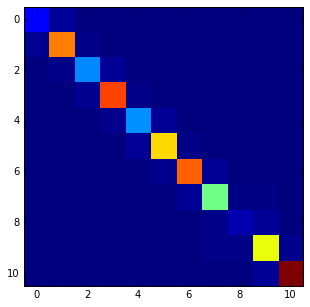

In [6]:
fig = plt.figure(figsize=(5,5))
plt.imshow(arr, cmap=plt.get_cmap('jet'), interpolation='nearest')
#fig.savefig('zseg_mat_1461944084.pdf')

In [7]:
arr_tracks = np.load('tracks_with_cuts_updated.npy')

In [8]:
arr_tracks = reorder_matrix(arr_tracks)

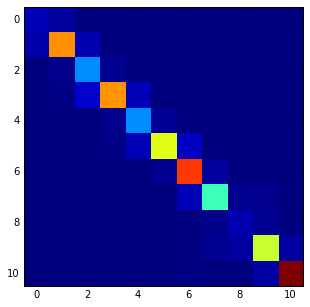

In [9]:
fig = plt.figure(figsize=(5,5))
plt.imshow(arr_tracks, cmap=plt.get_cmap('jet'), interpolation='nearest')
#fig.savefig('zseg_mat_1461944084.pdf')

We row normalize (divide by `axis=1` to get the _purity_ - it is saying "okay, I reconstructed an event in target 1, what fraction of the events really come from target 1? what fraction came from segments 0 or 6?, etc."

In [10]:
arr3 = np.arange(16, dtype=np.float32).reshape(4, 4)
print arr3

[[  0.   1.   2.   3.]
 [  4.   5.   6.   7.]
 [  8.   9.  10.  11.]
 [ 12.  13.  14.  15.]]


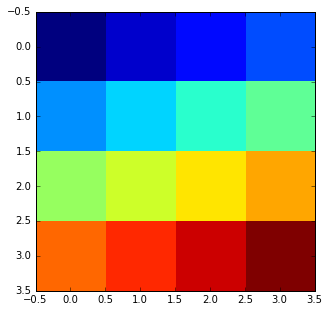

In [11]:
fig = plt.figure(figsize=(5,5))
plt.imshow(arr3, cmap=plt.get_cmap('jet'), interpolation='nearest')

In [12]:
print arr3.sum(axis=0)  # sum the columns

[ 24.  28.  32.  36.]


In [13]:
print arr3.sum(axis=1)  # sum the rows

[  6.  22.  38.  54.]


In [14]:
arr4 = np.zeros_like(arr3)
for i in range(4):
    arr4[i, :] = arr3[i, :] / arr3.sum(axis=1)[i]   # sum the rows
print arr4

[[ 0.          0.16666667  0.33333334  0.5       ]
 [ 0.18181819  0.22727273  0.27272728  0.31818181]
 [ 0.21052632  0.23684211  0.2631579   0.28947368]
 [ 0.22222222  0.24074075  0.25925925  0.27777779]]


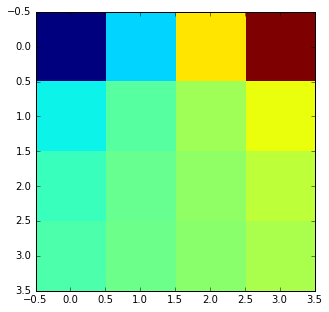

In [15]:
fig = plt.figure(figsize=(5,5))
plt.imshow(arr4, cmap=plt.get_cmap('jet'), interpolation='nearest')

In [16]:
pur = np.zeros_like(arr)
for i in range(np.shape(arr)[0]):
    pur[i, :] = arr[i, :] / arr.sum(axis=1)[i]
    
pur_tracks = np.zeros_like(arr_tracks)
for i in range(np.shape(arr_tracks)[0]):
    pur_tracks[i, :] = arr_tracks[i, :] / arr_tracks.sum(axis=1)[i]

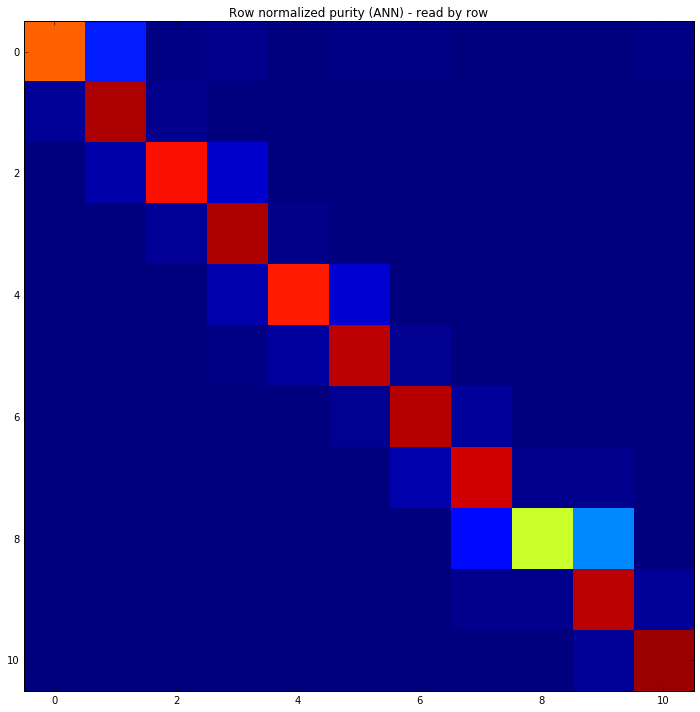

In [17]:
fig = plt.figure(figsize=(12,12))
plt.title("Row normalized purity (ANN) - read by row")
plt.imshow(pur, cmap=plt.get_cmap('jet'), interpolation='nearest', vmin=0, vmax=1)

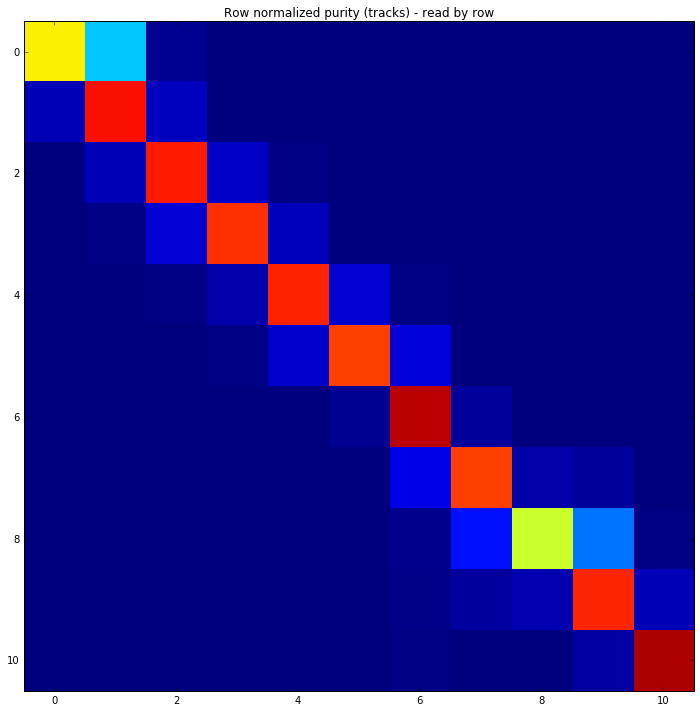

In [18]:
fig = plt.figure(figsize=(12,12))
plt.title("Row normalized purity (tracks) - read by row")
plt.imshow(pur_tracks, cmap=plt.get_cmap('jet'), interpolation='nearest', vmin=0, vmax=1)

In [19]:
print np.max(pur - pur_tracks)
print np.min(pur - pur_tracks)

0.152263255204
-0.167228961651


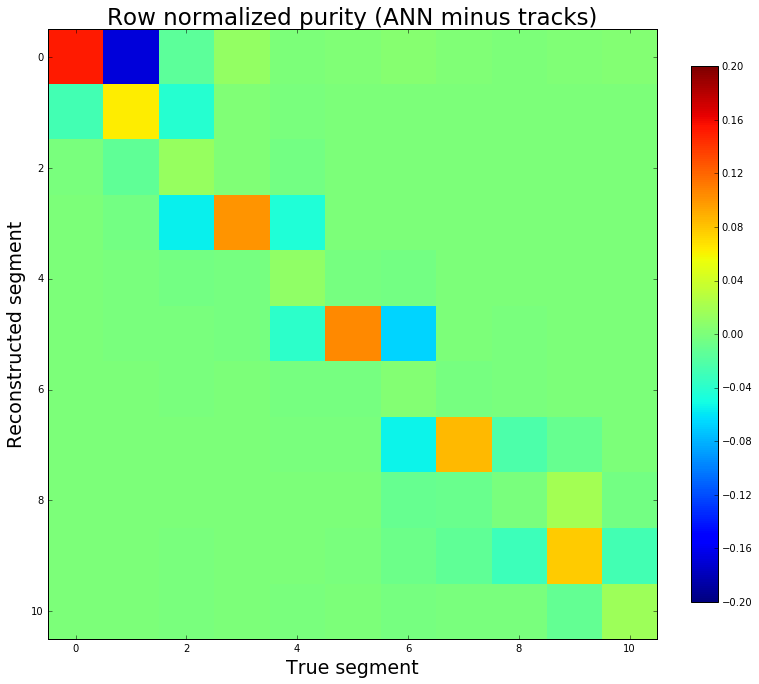

In [20]:
fig = plt.figure(figsize=(12,12))
plt.title("Row normalized purity (ANN minus tracks)", fontsize=23)
plt.imshow(pur - pur_tracks, cmap=plt.get_cmap('jet'), interpolation='nearest', vmin=-0.2, vmax=0.2)
plt.colorbar(fraction=0.04)
plt.xlabel('True segment', fontsize=19)
plt.ylabel('Reconstructed segment', fontsize=19)
fig.savefig('zseg_reordered_rownorm_1461944084.pdf')

We column normalize (divide by `axis=0` to get the _efficiency_ - it is saying "okay, I have an event really coming from target 1 (reading the "y-axis"), was it reconstructed in target 1?, etc. (reading along the x for a given y)"

In [21]:
eff = np.zeros_like(arr)
for i in range(np.shape(arr)[0]):
    eff[:, i] = arr[:, i] / arr.sum(axis=0)[i]
    
eff_tracks = np.zeros_like(arr_tracks)
for i in range(np.shape(arr_tracks)[0]):
    eff_tracks[:, i] = arr_tracks[:, i] / arr_tracks.sum(axis=0)[i]

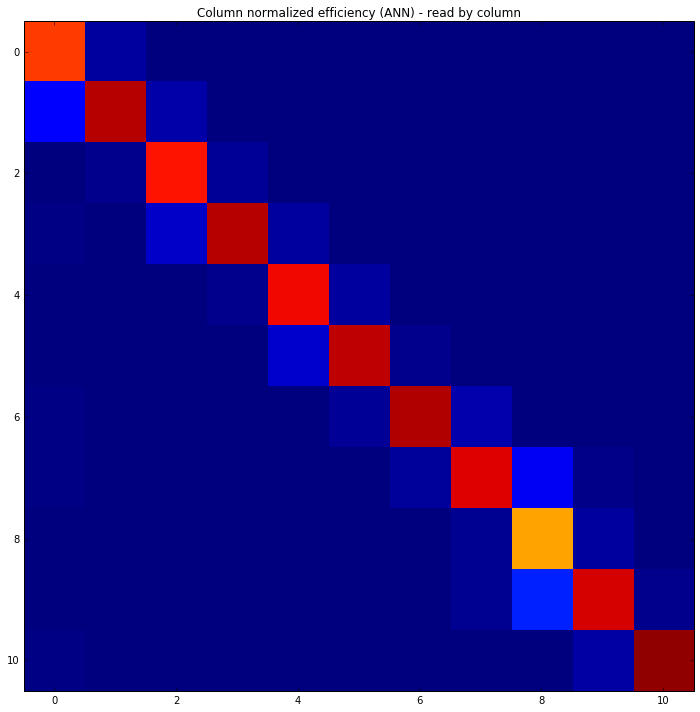

In [22]:
fig = plt.figure(figsize=(12,12))
plt.title("Column normalized efficiency (ANN) - read by column")
plt.imshow(eff, cmap=plt.get_cmap('jet'), interpolation='nearest', vmin=0, vmax=1)

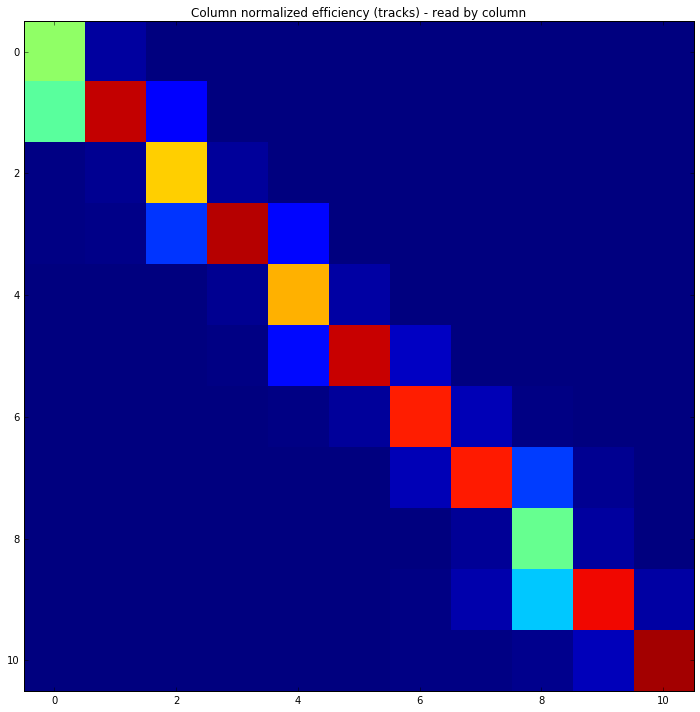

In [23]:
fig = plt.figure(figsize=(12,12))
plt.title("Column normalized efficiency (tracks) - read by column")
plt.imshow(eff_tracks, cmap=plt.get_cmap('jet'), interpolation='nearest', vmin=0, vmax=1)

In [24]:
print np.max(eff - eff_tracks)
print np.min(eff - eff_tracks)

0.3224671136
-0.335030856475


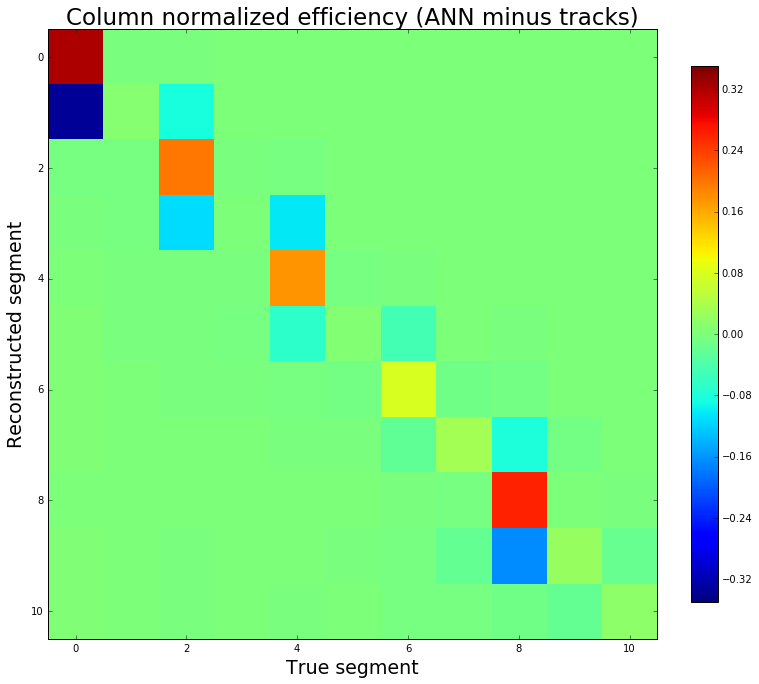

In [25]:
fig = plt.figure(figsize=(12,12))
plt.title("Column normalized efficiency (ANN minus tracks)", fontsize=23)
plt.imshow(eff - eff_tracks, cmap=plt.get_cmap('jet'), interpolation='nearest', vmin=-0.35, vmax=0.35)
plt.colorbar(fraction=0.04)
plt.xlabel('True segment', fontsize=19)
plt.ylabel('Reconstructed segment', fontsize=19)
fig.savefig('zseg_reordered_colnorm_1461944084.pdf')